## Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

##### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

##### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [598]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,plot_roc_curve

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import make_column_transformer

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [501]:
data=pd.read_csv("D:\\Data Trained\\data(git-hub)\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [502]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Showing dataset

In [503]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

At the first glance, the features (without target variable "Attrition") can be divided into few categories:
1) Income related
continuous features - Daily Rate, Hourly Rate, Monthly Income, Monthly Rate
categorical features - Stock Option Level, Job Level, Job Role, Department

2) Job Satisfaction - Job Involvement, Environment Satisfaction, Job Satisfaction, Work Life Balance, RelationShip Satisfaction, Performance Rating, Distance From Home, Percent Salary Hike

3) Demographics - Age, Education, Ed. Field, Gender, Marital Status

4) Work-Place - Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager, Business Travel, Num Companies Worked, Over Time, Total Working Years, Training Times Last Year and specific category with already redundant variables

5) Others - Emloyee Number, Employee Count, Over 18, Standard Hours

In [504]:
data.shape

(1470, 35)

data has 1470 no. of records and 35 columns including target vaiable.

In [505]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

All columns has 1470 no, of records which are either of integer type or of object type

In [506]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values.

#### Transforming categorical variables

In [507]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [508]:
data['Attrition']=data.Attrition.replace({'Yes':1,"No":0})

Replace Attrition Yes with 1 and No with 0.

In [509]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [510]:
data['BusinessTravel']=data['BusinessTravel'].replace({"Travel_Rarely":0,"Travel_Frequently":1,'Non-Travel':2})

In [511]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [512]:
data['Department']=data['Department'].replace({'Sales':0, 'Research & Development':1, 'Human Resources':2})

In [513]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [514]:
le=LabelEncoder()
data['EducationField']=le.fit_transform(data['EducationField'])

In [515]:
data['Gender']=le.fit_transform(data['Gender'])

In [516]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [517]:
data['JobRole']=le.fit_transform(data['JobRole'])

In [518]:
data['JobRole'].unique()

array([7, 6, 2, 4, 0, 3, 8, 5, 1], dtype=int64)

In [519]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [520]:
data['MaritalStatus']=le.fit_transform(data['MaritalStatus'])

In [521]:
data['MaritalStatus'].unique()

array([2, 1, 0], dtype=int64)

In [522]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [523]:
data['Over18']=data['Over18'].replace('Y',0)

In [524]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [525]:
data['OverTime']=le.fit_transform(data['OverTime'])

In [526]:
data.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

All columns are ogf integer types. BY using LabelEncoder technique.

In [527]:
data.EmployeeNumber.nunique() == data.shape[0]

True

EmployeeNumber is unique for all records.

## EDA

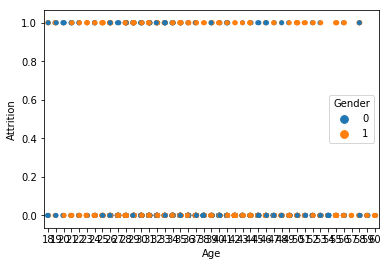

In [528]:
sns.stripplot(x='Age',y='Attrition',data=data,hue='Gender')

Showing graph for the relation of Age v/s Atrition with respect to their genders. Ant the Ages for both male and gender are distributed normally.

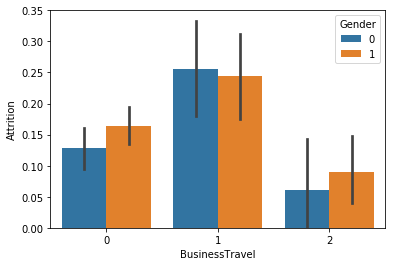

In [529]:
sns.barplot(x='BusinessTravel',y='Attrition',data=data,hue='Gender')

the atrition is highly dependent who travels most either it is male or female.

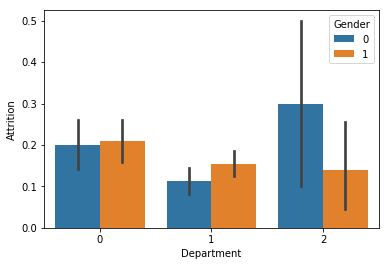

In [530]:
sns.barplot(x='Department',y='Attrition',data=data,hue='Gender')

the attrition is highly dependent on HR Department for females. While in sales department both male & female contributed same for attrition And in Research& Development Department males attrition is high.

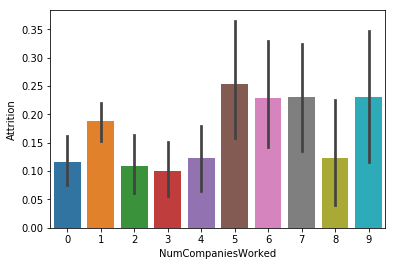

In [531]:
sns.barplot(data['NumCompaniesWorked'],data['Attrition'])

employess who worked for more than 4 companies has higher chance of getting aattrition.

In [532]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


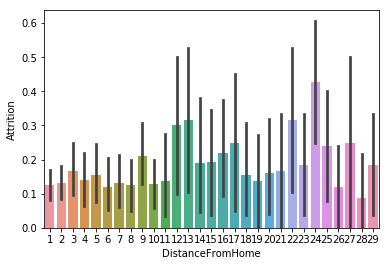

In [533]:
sns.barplot(x='DistanceFromHome',y='Attrition',data=data)

the distance from home of range 1-11 has says 20% chance of Attrition other of range   has more than 20% chances.

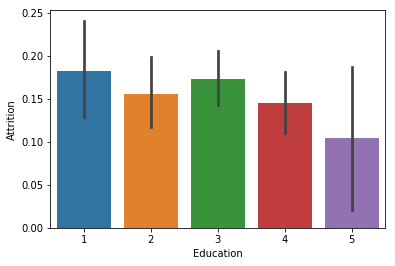

In [534]:
sns.barplot(x='Education',y='Attrition',data=data)

5th type of education has very less chances of getting attrition.

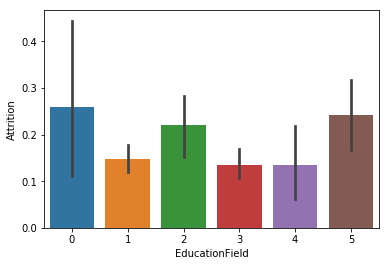

In [535]:
sns.barplot(x='EducationField',y='Attrition',data=data)

Life Sciences,Medical & others type of Education Feild has low chances for Attrition.

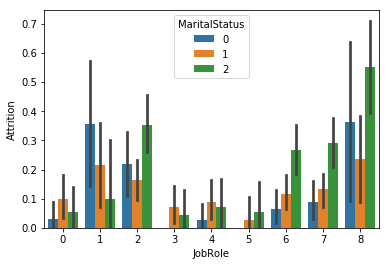

In [536]:
sns.barplot(x='JobRole',y='Attrition',hue='MaritalStatus',data=data)

Divorced for JobRole HR,Single Laboratory Technician  , Sales representative has the highes chances for Attrition w.r.t others.

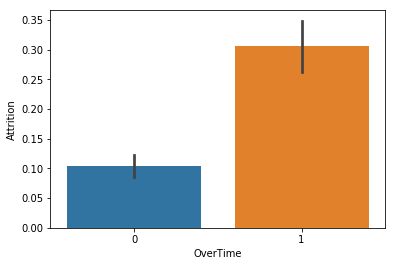

In [537]:
sns.barplot(x='OverTime',y='Attrition',data=data)

employees who overtimes has highest chances for attrition.

#### Scatterplot

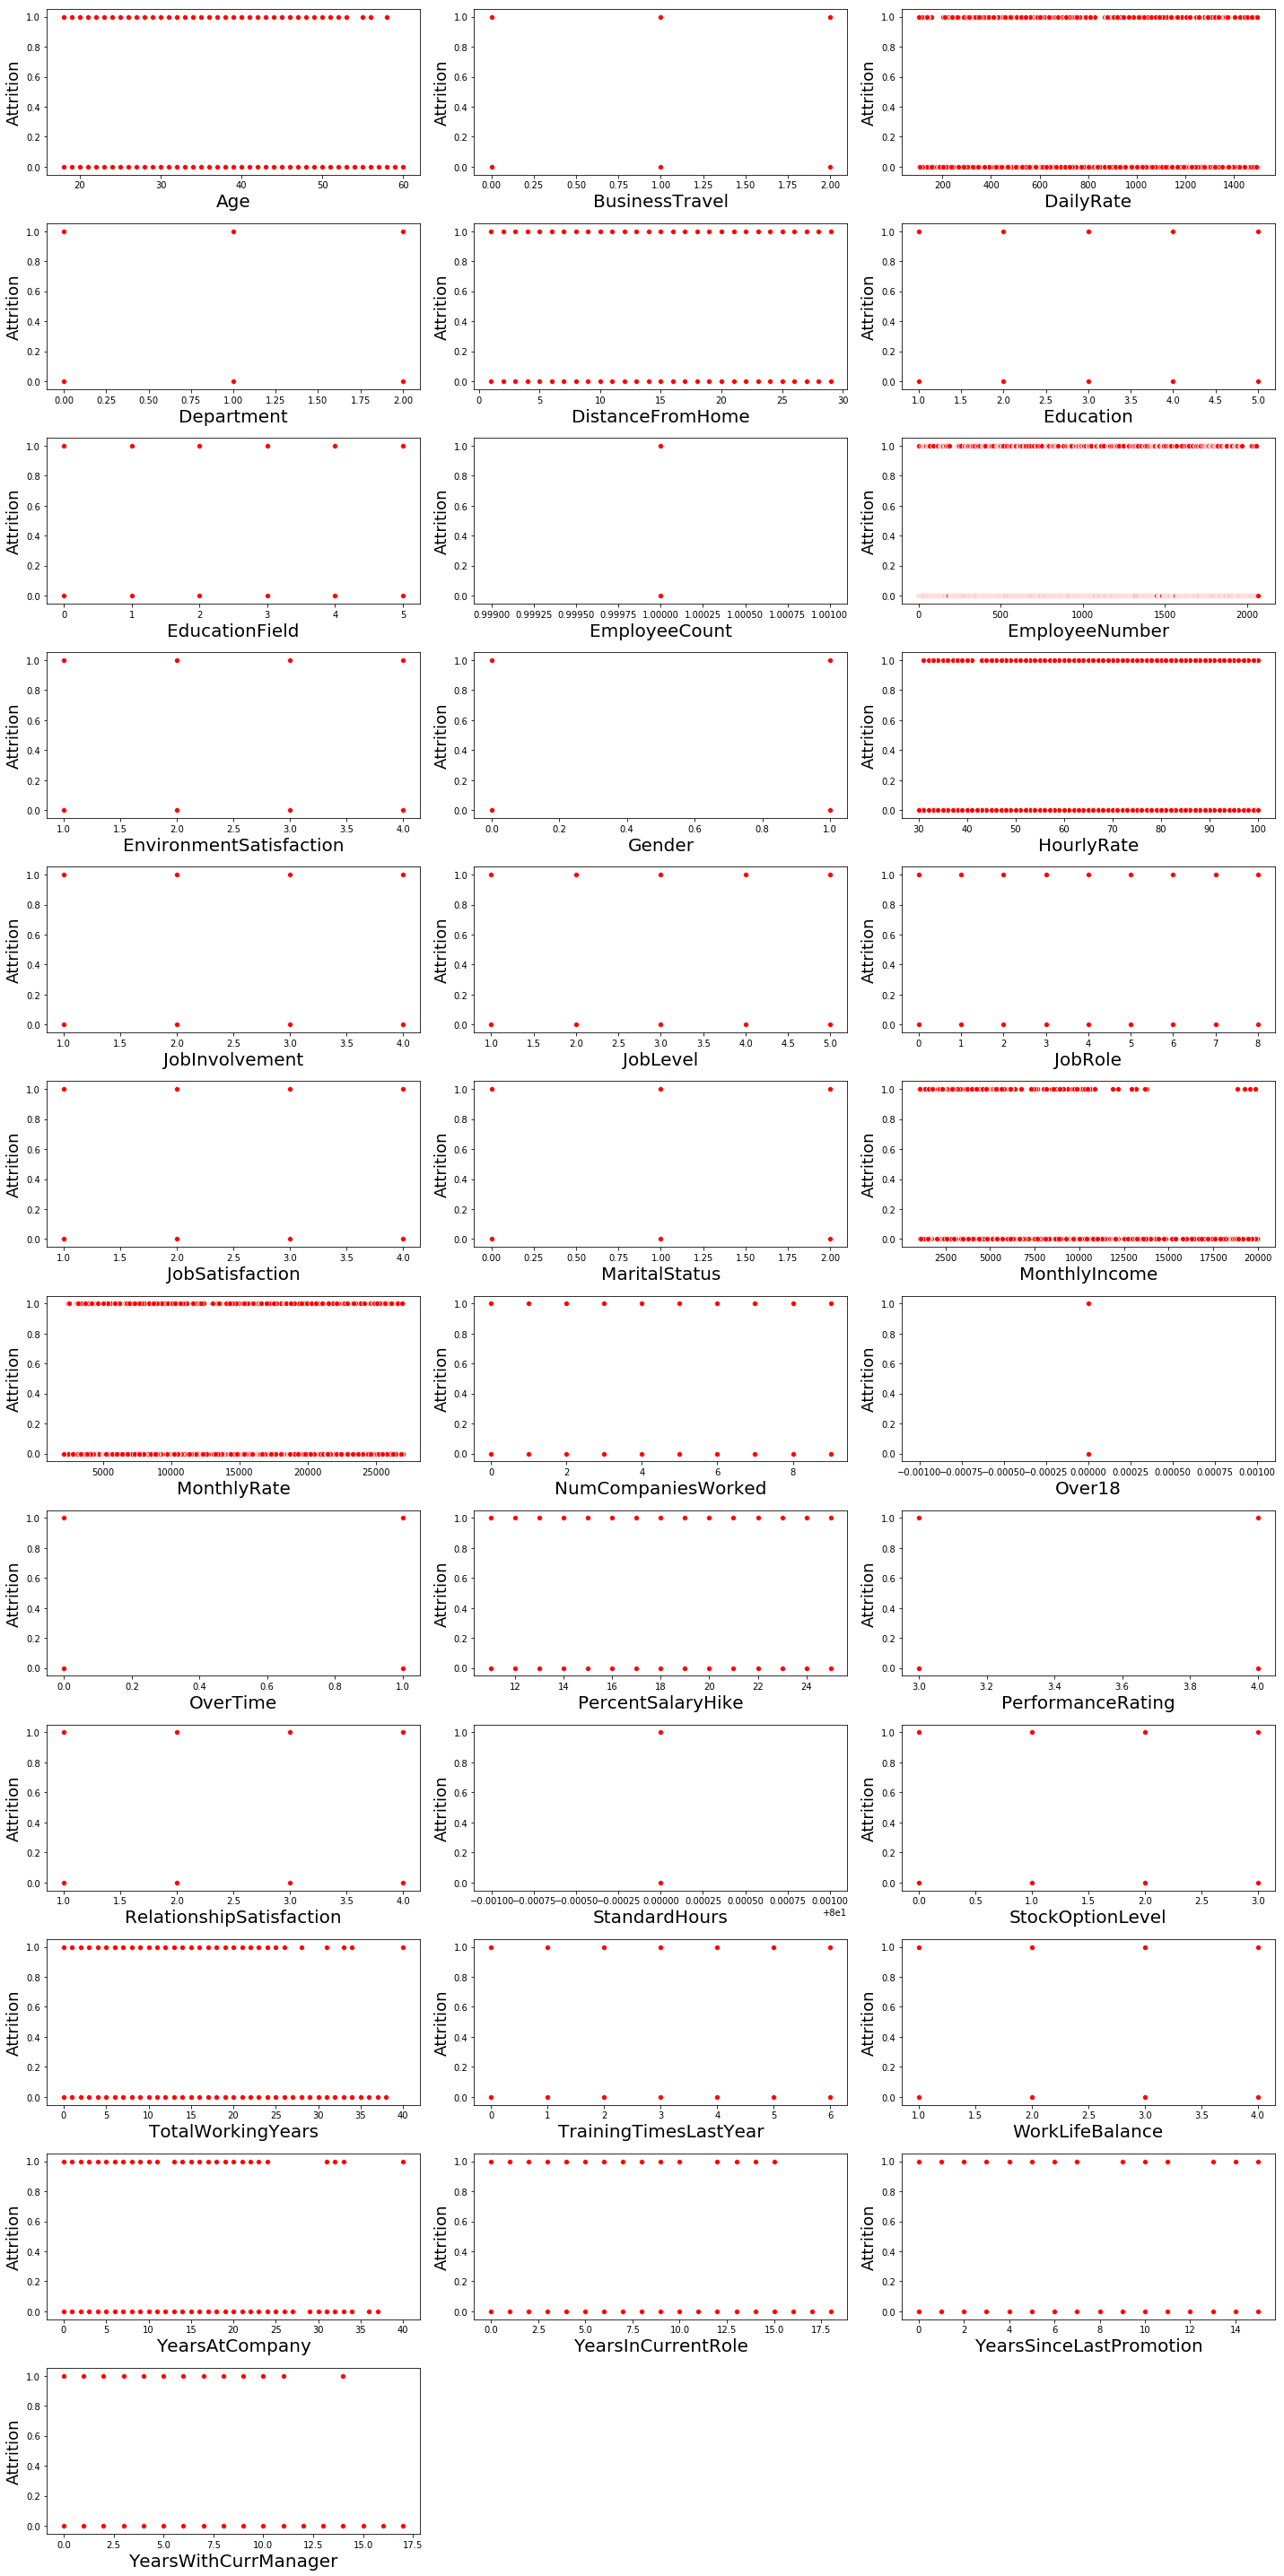

In [538]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(['Attrition'],axis=1):
    if graph<35:
        ax=plt.subplot(12,3,graph)
        sns.scatterplot(data[col],data['Attrition'],color='Red')
        plt.xlabel(col,fontsize=20)
        plt.ylabel("Attrition",fontsize=18)
    graph+=1
plt.tight_layout()

from above graph i get that to know that all features are distributed normally to attrtion.

The over , EmployeeCount,StandardHours has a single valued in it that is of no use and EmployeeNo. is the unique id of the employees.

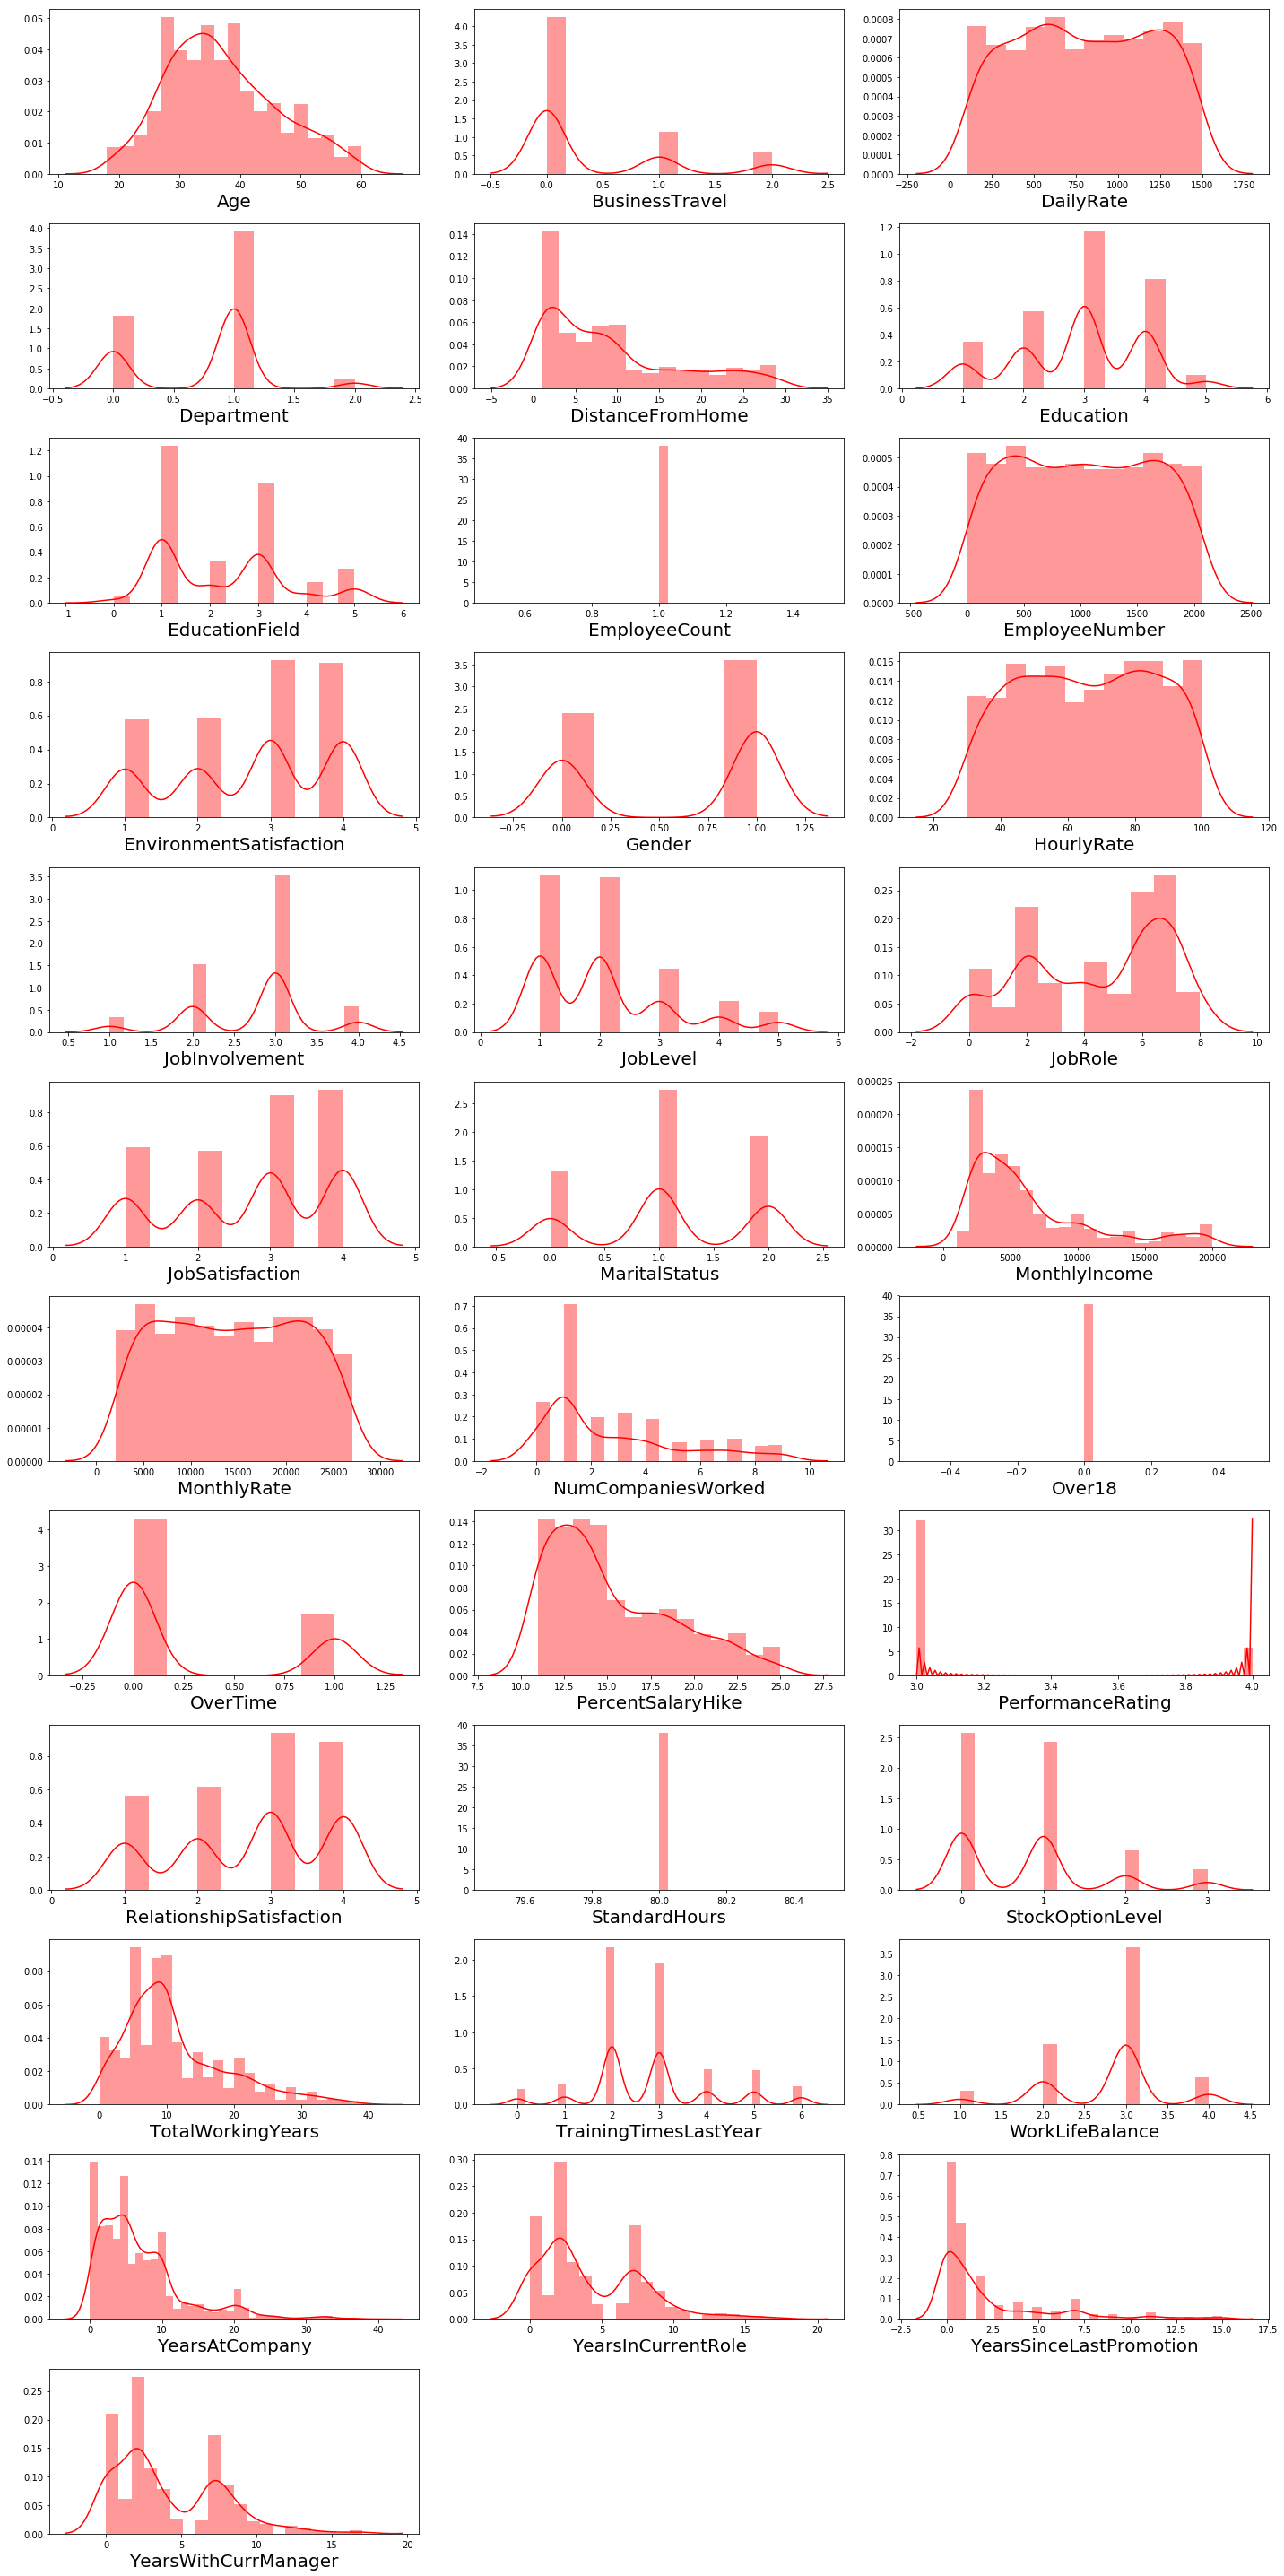

In [539]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(['Attrition'],axis=1):
    if graph<35:
        ax=plt.subplot(12,3,graph)
        sns.distplot(data[col],color='Red')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerSalaryHike,Performancerating,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager these are the features that are skewed and are not normally disributed. 

In [540]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              1.439006
DailyRate                  -0.003519
Department                 -0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

BusinessTravel,DistanceFromHome,EducationField,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerSalaryHike,
Performancerating,StockOptionLevel,TrainingTimesLastYear,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,
YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager these are the features that are not in range 
of -0.5 to 0.5.
So, these features are skewed.
These features has to be distributed normally.

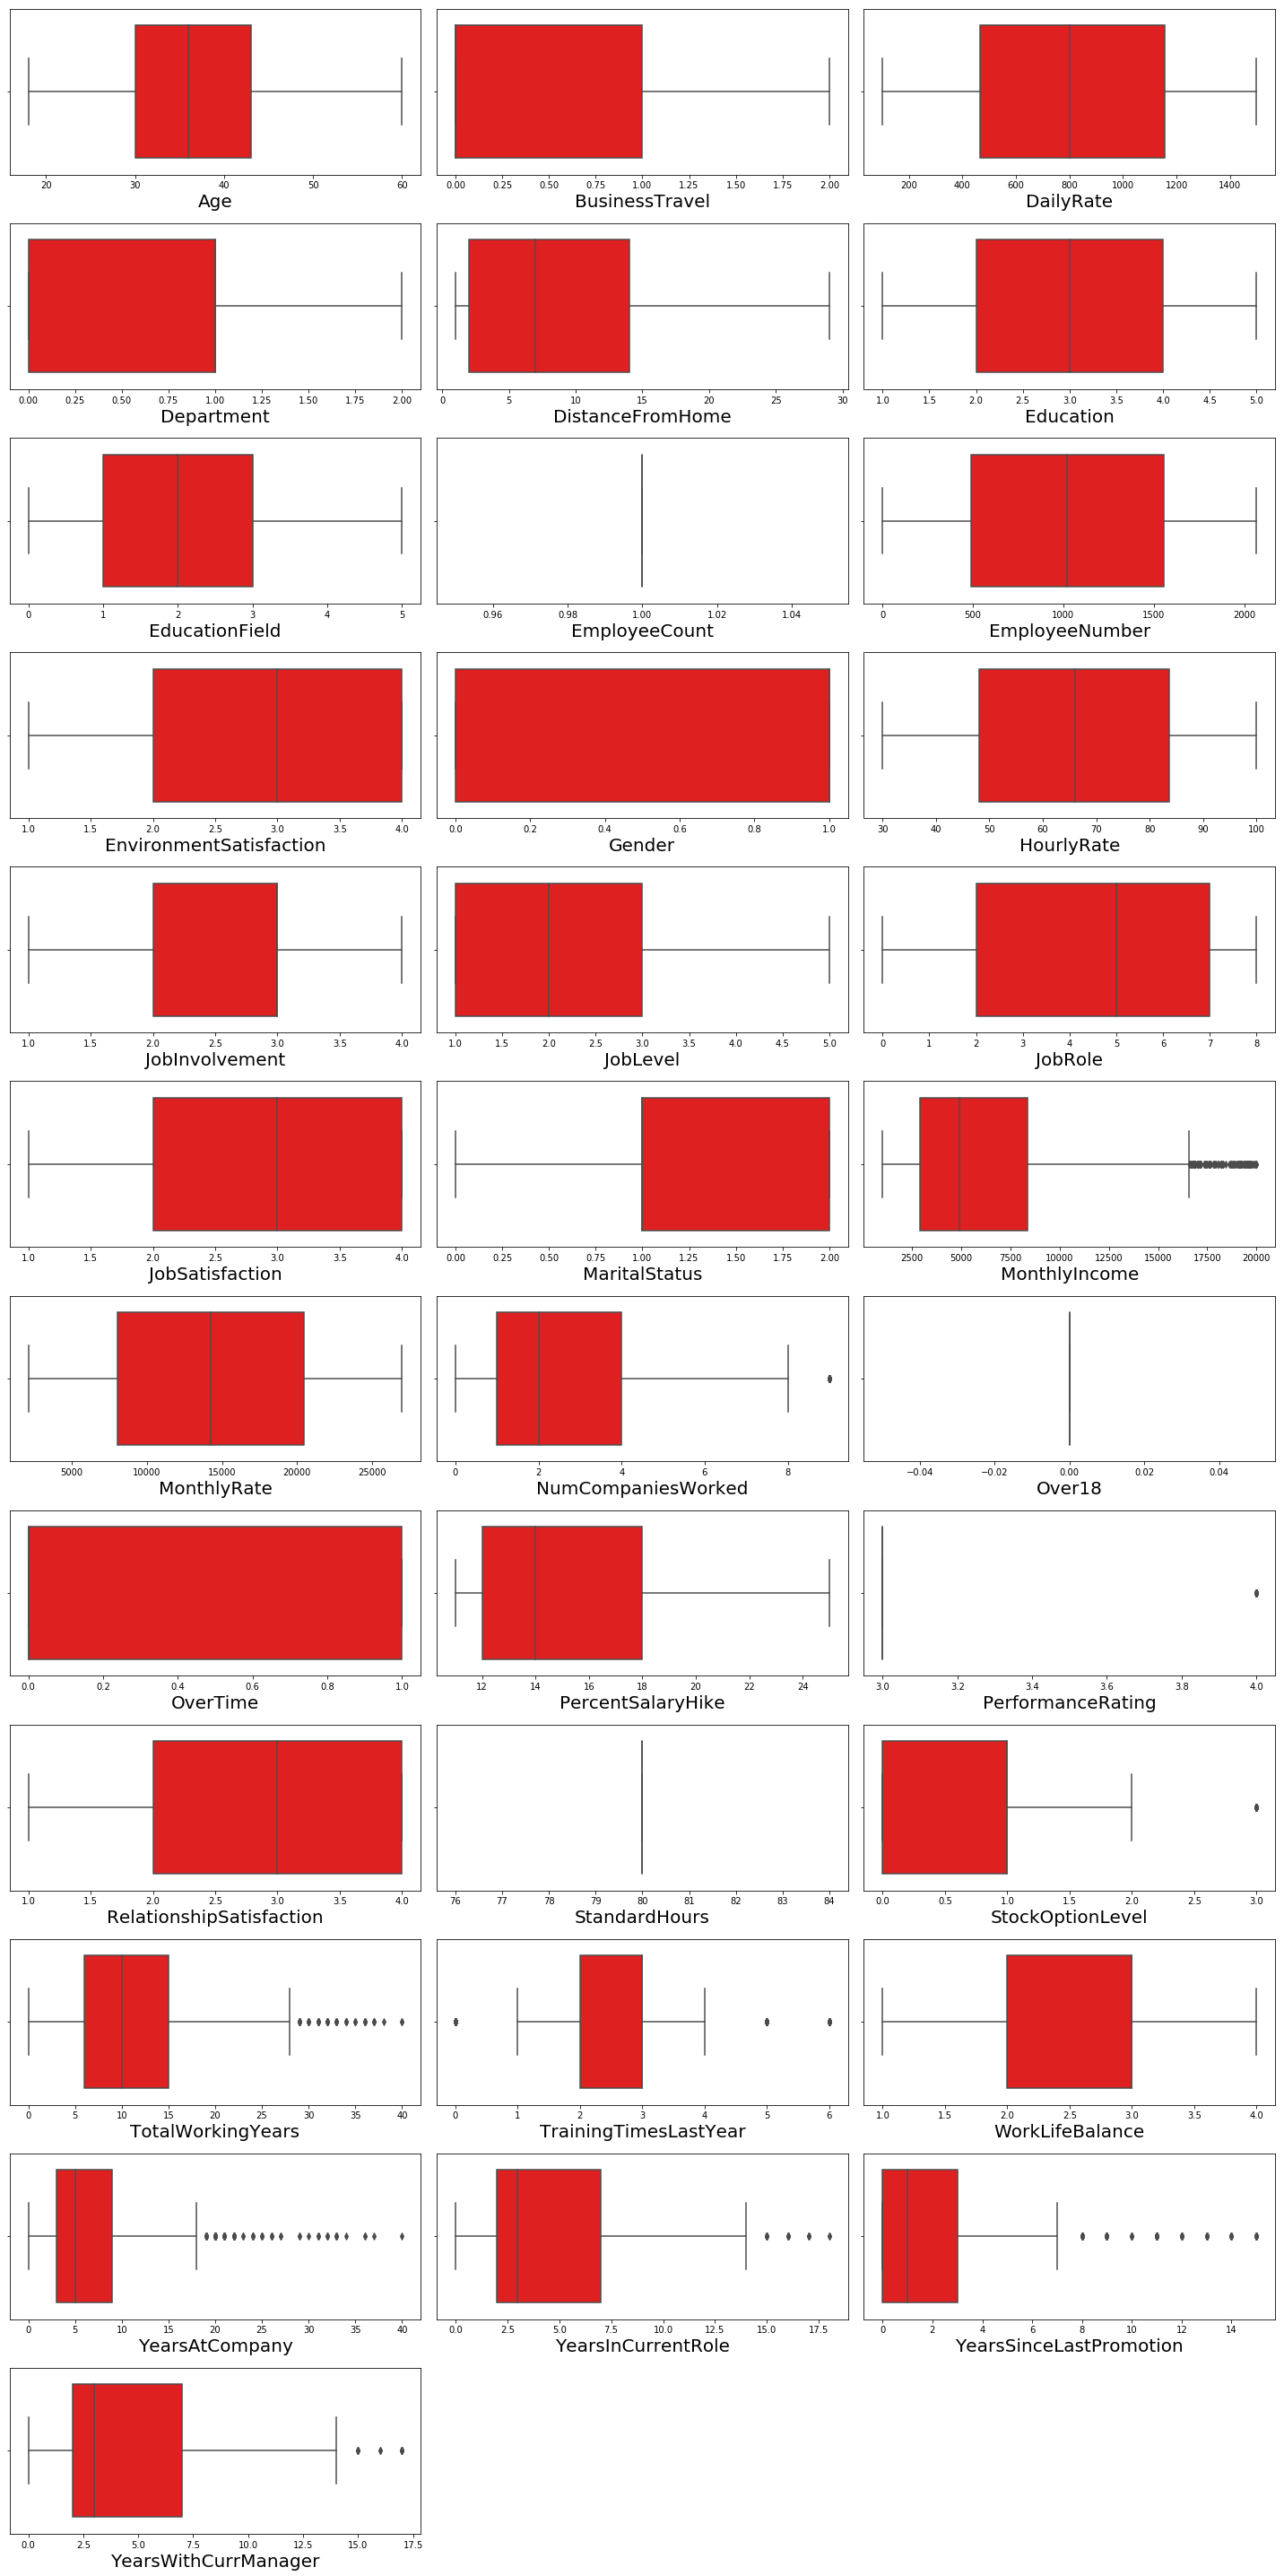

In [541]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(['Attrition'],axis=1):
    if graph<35:
        ax=plt.subplot(12,3,graph)
        sns.boxplot(data[col],color='Red')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
these are the features that has outliers.

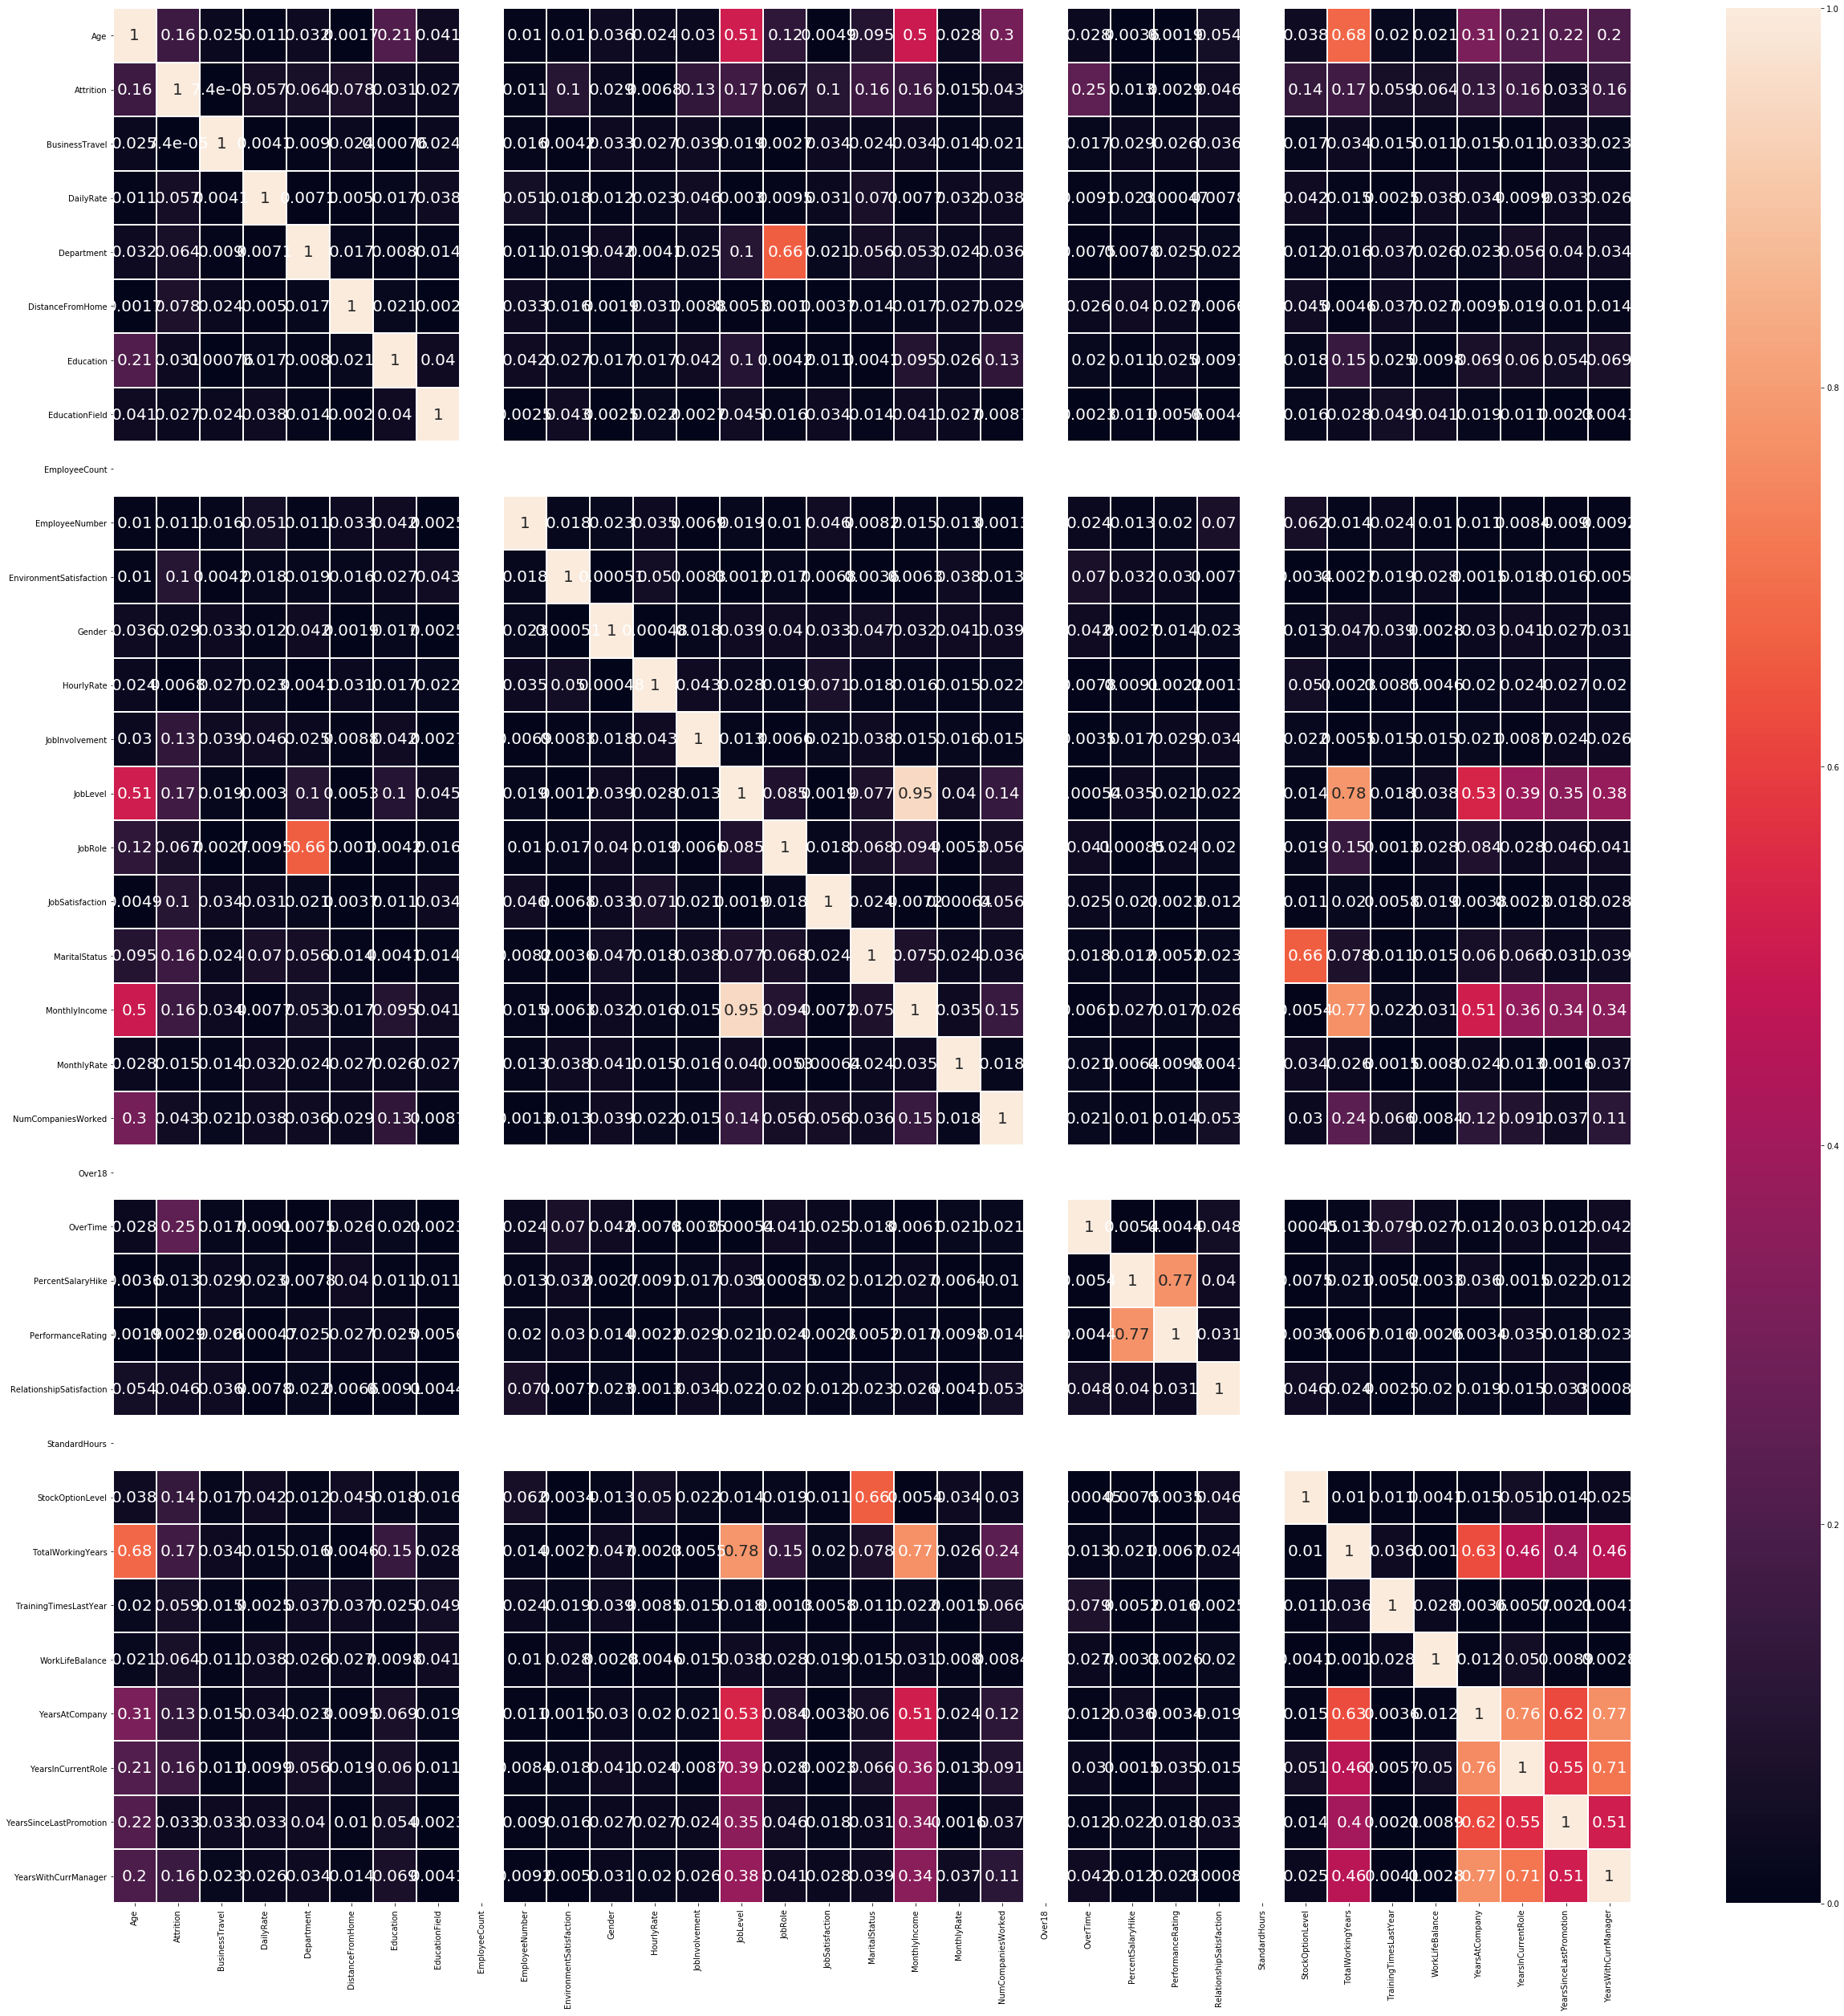

In [542]:
plt.figure(figsize=(35,35))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":20},linewidths=True)
plt.tight_layout()

PercentSalaryHike,PerformanceRating are colinear 77%.

JobLevel,TotalWorkingYears are collinear 78%.

JobLevel,MonthlyIncome are collinear 95%.

TotalWorkingYears,MonthlyIncome are collinear 77%.

YearsAtCompany are collinear with YearsInCurrentRole and YearsWithCurrManager i.e. 76% and 77%

YearsInCurrentRole is collinear with YearsWithCurrManager i.e. 71%.

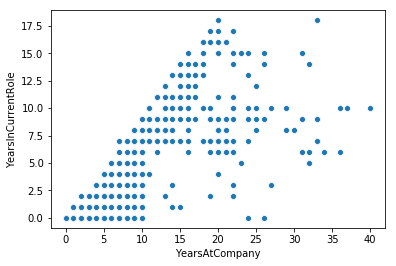

In [543]:
sns.scatterplot(data['YearsAtCompany'],data['YearsInCurrentRole'])

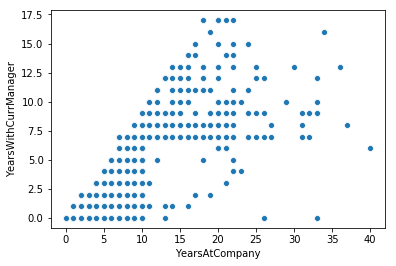

In [544]:
sns.scatterplot(data['YearsAtCompany'],data['YearsWithCurrManager'])

As above two graphs these are collinear with 75+% .

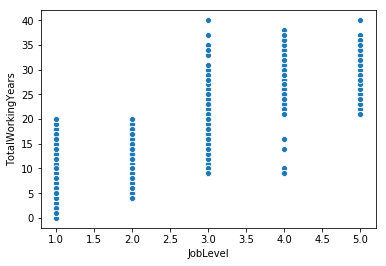

In [545]:
sns.scatterplot(data['JobLevel'],data['TotalWorkingYears'])

these two features are also collinear.

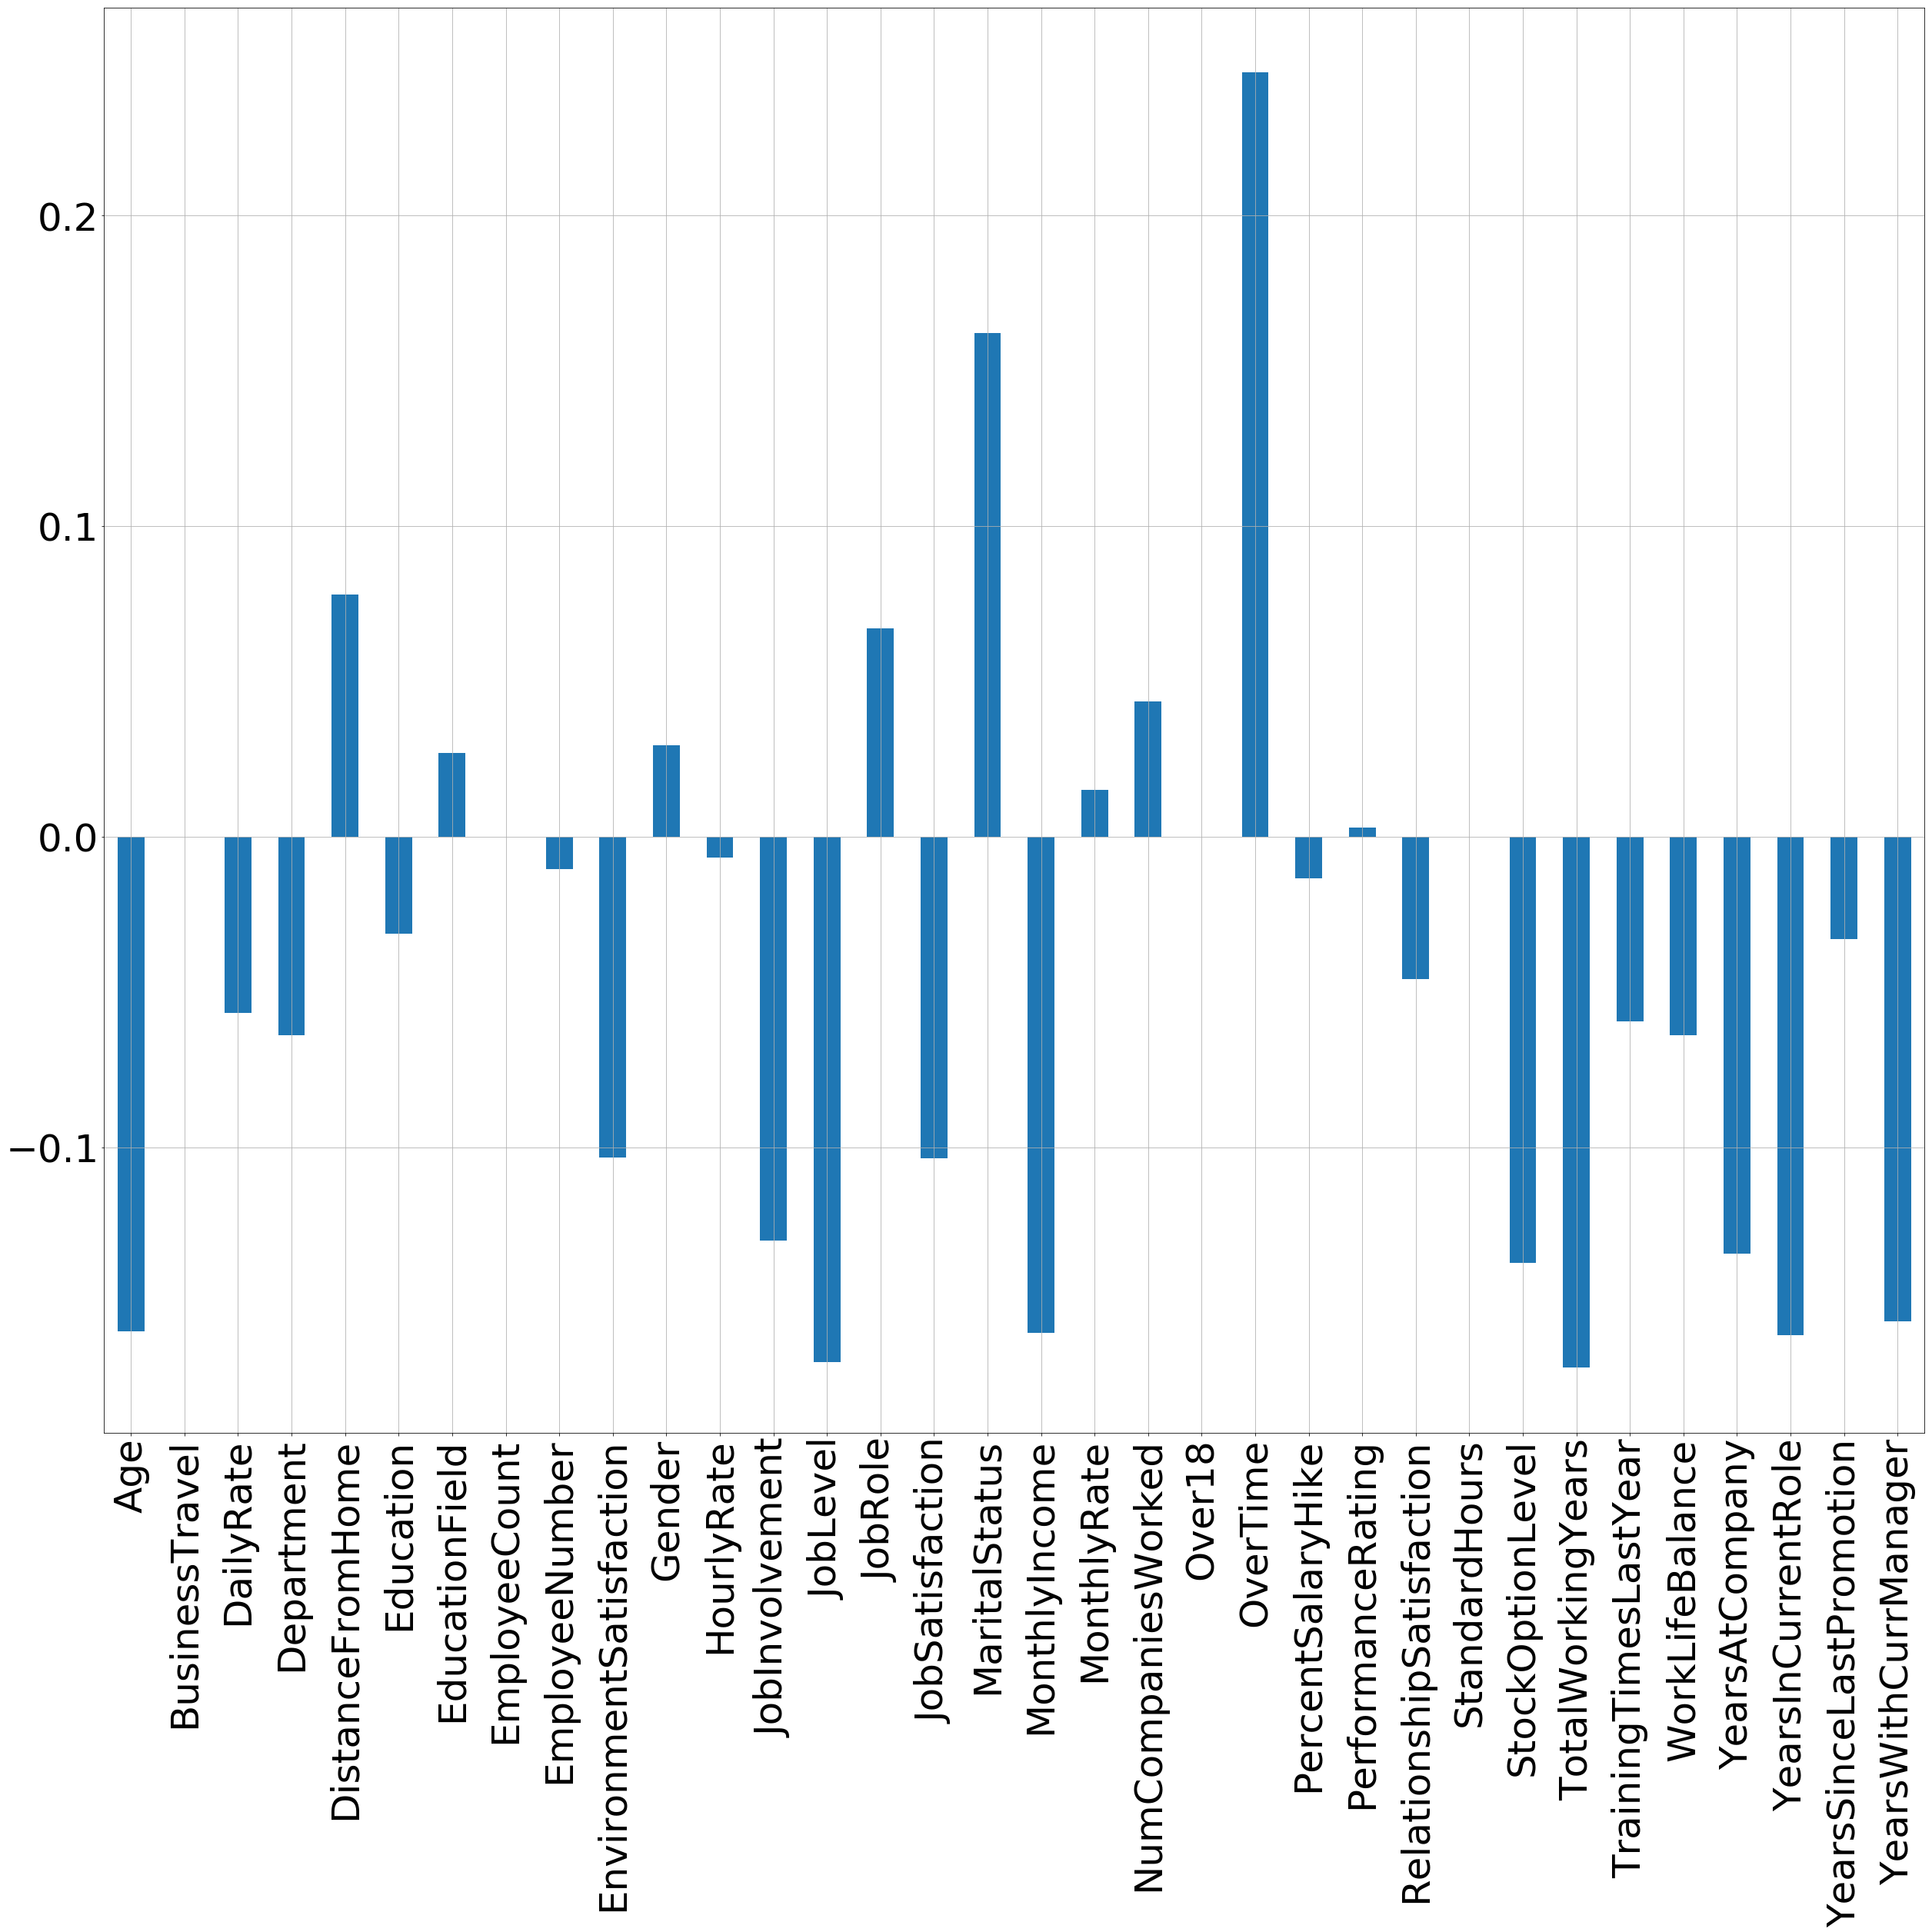

In [546]:
plt.figure(figsize=(35,35))
data.drop(['Attrition'],axis=1).corrwith(data.Attrition).plot(kind='bar',grid=True,fontsize=50)
plt.tight_layout()

In [547]:
data.drop(['Attrition'],axis=1).corrwith(data.Attrition)

Age                        -0.159205
BusinessTravel             -0.000074
DailyRate                  -0.056652
Department                 -0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
T

showing Graph and the above values about the relation between features and target varirables.

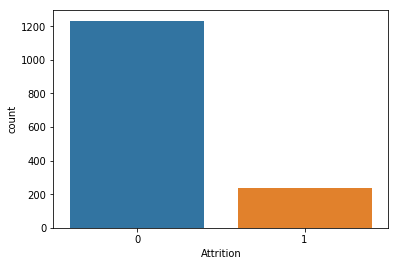

In [548]:
sns.countplot(data.Attrition)

Our data is imbalanced we have to balance that to..

In [549]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [550]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Attrition~Age+BusinessTravel+DailyRate+Department+DistanceFromHome+Education+EducationField+EmployeeCount+EmployeeNumber+EnvironmentSatisfaction+Gender+HourlyRate+JobInvolvement+JobLevel+JobRole+JobSatisfaction+MaritalStatus+MonthlyIncome+MonthlyRate+NumCompaniesWorked+Over18+OverTime+PercentSalaryHike+PerformanceRating+RelationshipSatisfaction+StandardHours+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+WorkLifeBalance+YearsAtCompany+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager',data=data).fit()

lm.rsquared_adj

0.1979837500549032

Taking all features gives 0.1979 adjusted r-squared.

In [551]:
from sklearn.feature_selection import SelectPercentile,chi2
SP=SelectPercentile(score_func=chi2,percentile=80)
SP.fit(data.drop(['Attrition'],axis=1),data.Attrition)
col=SP.get_support(indices=True)
features=data.drop(['Attrition'],axis=1).columns[col]
df_feature=pd.DataFrame({'features':data.drop(['Attrition'],axis=1),'Chi2score':SP.scores_,"pValues":SP.pvalues_})
df_feature.sort_values(by='Chi2score',ascending=False)

,features,Chi2score,pValues
17,"(M, o, n, t, h, l, y, I, n, c, o, m, e)",1.279223e+05,0.000000e+00
18,"(M, o, n, t, h, l, y, R, a, t, e)",1.196634e+03,3.287933e-262
2,"(D, a, i, l, y, R, a, t, e)",9.565805e+02,4.923924e-210
27,"(T, o, t, a, l, W, o, r, k, i, n, g, Y, e, a, ...",2.307216e+02,4.149262e-52
30,"(Y, e, a, r, s, A, t, C, o, m, p, a, n, y)",1.421001e+02,9.247066e-33
31,"(Y, e, a, r, s, I, n, C, u, r, r, e, n, t, R, ...",1.175226e+02,2.205728e-27
33,"(Y, e, a, r, s, W, i, t, h, C, u, r, r, M, a, ...",1.106715e+02,6.983363e-26
0,"(A, g, e)",8.415528e+01,4.574015e-20
21,"(O, v, e, r, T, i, m, e)",6.384507e+01,1.345990e-15
4,"(D, i, s, t, a, n, c, e, F, r, o, m, H, o, m, e)",6.377214e+01,1.396748e-15


Based on Chi2Score we select features Higher the Chi2Score &lower the pValue  Higher the impact to predict the target varirable.

In [552]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Attrition~Age+DailyRate+Department+DistanceFromHome+EnvironmentSatisfaction+JobInvolvement+JobLevel+JobRole+JobSatisfaction+MaritalStatus+MonthlyRate+NumCompaniesWorked+OverTime+PercentSalaryHike+RelationshipSatisfaction+WorkLifeBalance+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+YearsAtCompany+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager',data=data).fit()

lm.rsquared_adj

0.19905798828173393

over18,StandardHours,EmployeeCount,BusinessTravel,PerformanceRating,EmployeeNo.,MonthlyIncome droping these columns we have increased the adjusted r_squared valued i.e. now 0.1990

### Data Cleaning

In [553]:
data.drop(columns=['Over18','StandardHours','EmployeeCount','BusinessTravel','PerformanceRating','EmployeeNumber','MonthlyIncome'],axis=1,inplace=True)

In [554]:
data.shape

(1470, 28)

Dropped Columns For good model Confidence.

In [555]:
data.drop_duplicates(inplace=True)

In [556]:
data.shape

(1470, 28)

No Duplicates Values present.

In [557]:
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [558]:
zscore=zscore(data[['NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<3).all(axis=1)
data=data[filtered]

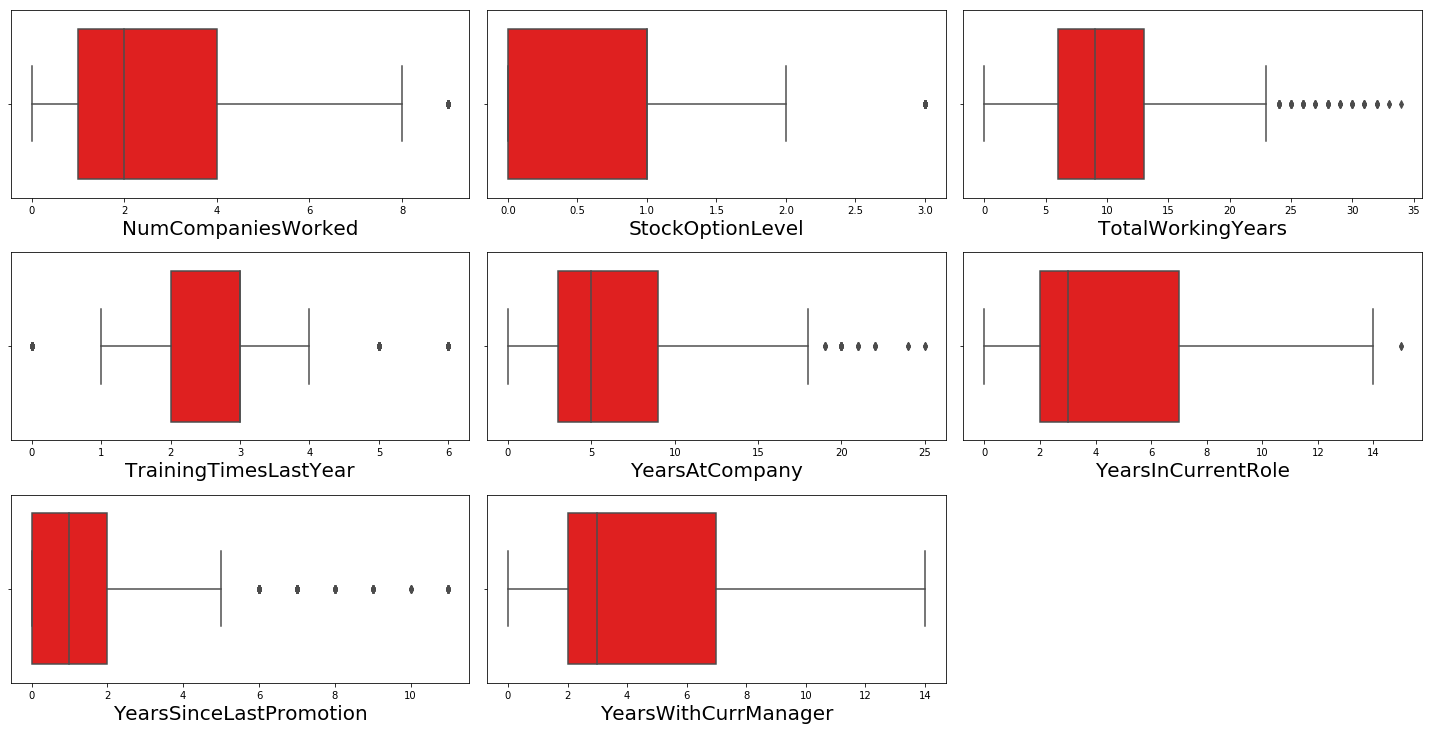

In [559]:
plt.figure(figsize=(20,40))
graph=1
for col in data[['NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]:
    if graph<35:
        ax=plt.subplot(12,3,graph)
        sns.boxplot(data[col],color='Red')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

We have remove some outlierswith Z-Score techniques.

In [560]:
data.drop(columns=["YearsWithCurrManager","YearsInCurrentRole","JobLevel"],axis=1,inplace=True)

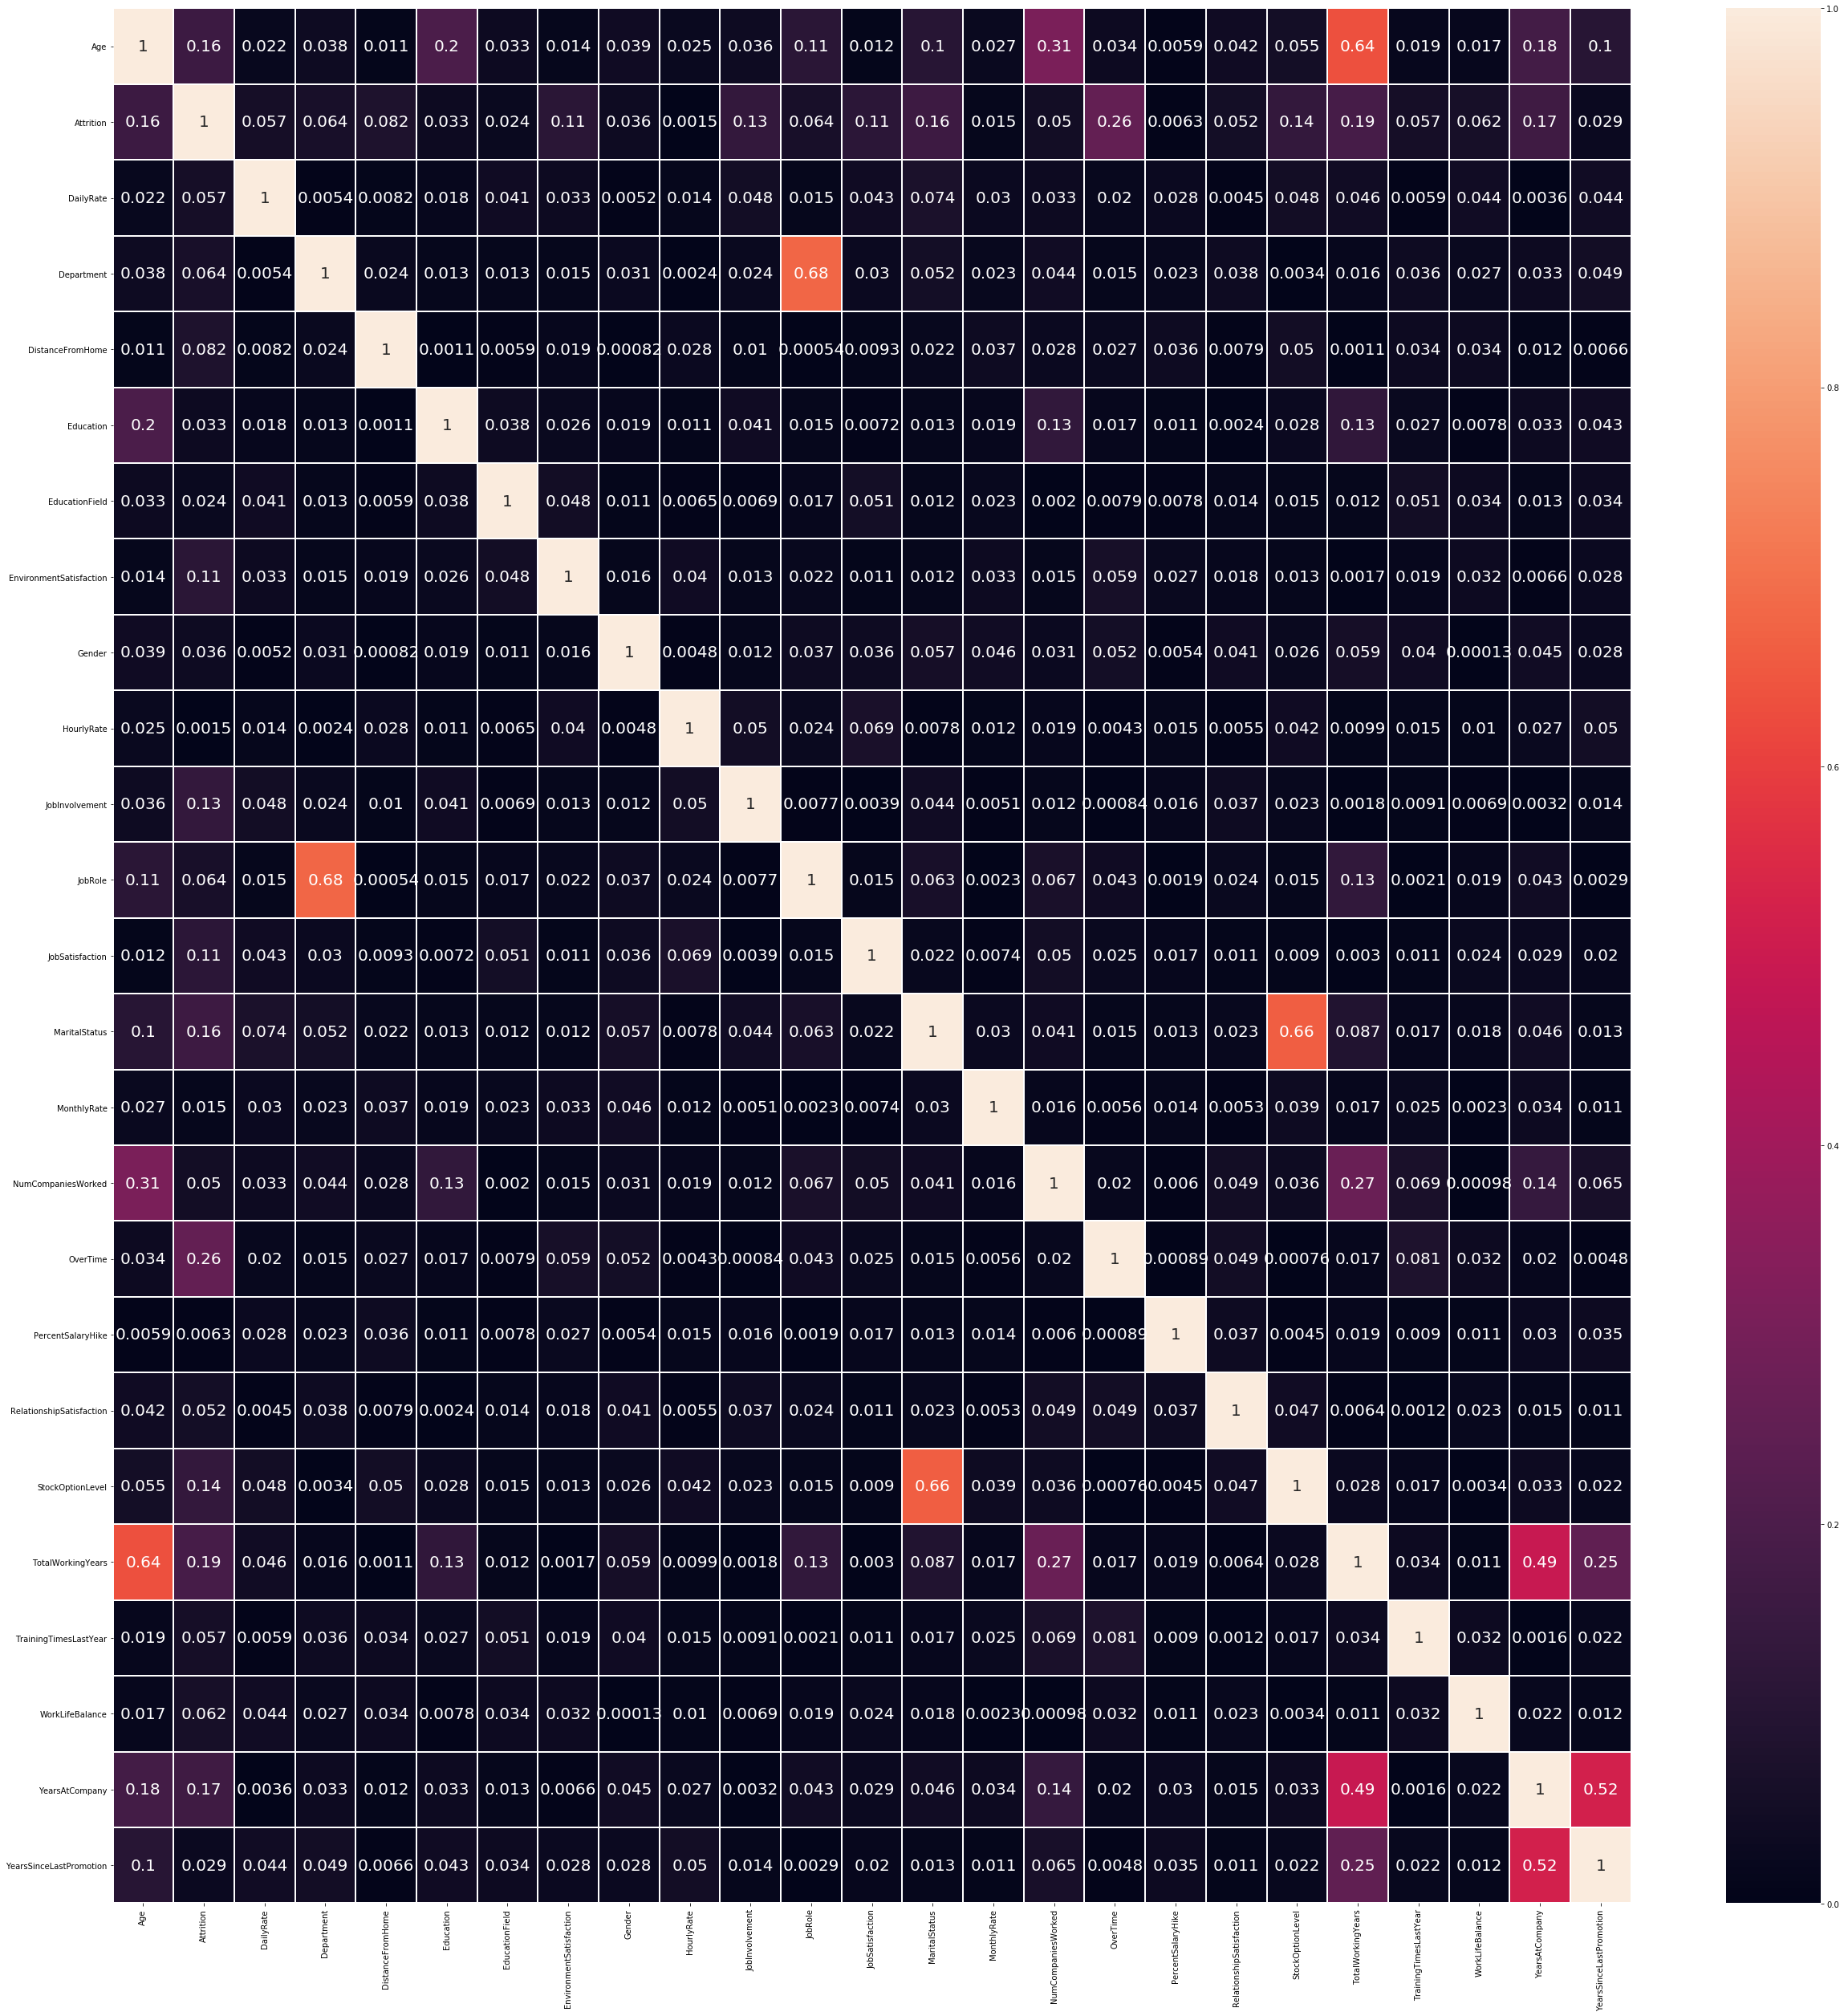

In [561]:
plt.figure(figsize=(35,35))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":20},linewidths=True)
plt.tight_layout()

Dropping these two more columns there is no multi-colinearity exists.

In [562]:
df=pd.DataFrame()
df['Columns']=data.drop(['Attrition'],axis=1).columns.tolist()
df['Corr_values_with_target']=np.abs(data.drop("Attrition",axis=1).corrwith(data['Attrition']).values).tolist()

In [563]:
df1=df.sort_values(by="Corr_values_with_target",ascending=False)

In [564]:
df1

,Columns,Corr_values_with_target
15,OverTime,0.257237
19,TotalWorkingYears,0.185619
22,YearsAtCompany,0.166455
12,MaritalStatus,0.160960
0,Age,0.159366
18,StockOptionLevel,0.136676
9,JobInvolvement,0.133957
11,JobSatisfaction,0.114206
6,EnvironmentSatisfaction,0.112393
3,DistanceFromHome,0.081788


In [565]:
col=df1.iloc[:20,:]['Columns'].tolist()

In [566]:
col

['OverTime',
 'TotalWorkingYears',
 'YearsAtCompany',
 'MaritalStatus',
 'Age',
 'StockOptionLevel',
 'JobInvolvement',
 'JobSatisfaction',
 'EnvironmentSatisfaction',
 'DistanceFromHome',
 'JobRole',
 'Department',
 'WorkLifeBalance',
 'TrainingTimesLastYear',
 'DailyRate',
 'RelationshipSatisfaction',
 'NumCompaniesWorked',
 'Gender',
 'Education',
 'YearsSinceLastPromotion']

here we get the top 17 columns for which target are highly dependent features.

In [567]:
col.append("Attrition")

In [568]:
data=data[col]

In [569]:
data.shape

(1387, 21)

In [570]:
data.describe()

,OverTime,TotalWorkingYears,YearsAtCompany,MaritalStatus,Age,StockOptionLevel,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,...,Department,WorkLifeBalance,TrainingTimesLastYear,DailyRate,RelationshipSatisfaction,NumCompaniesWorked,Gender,Education,YearsSinceLastPromotion,Attrition
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,0.284787,10.302091,6.104542,1.103100,36.258111,0.795963,2.733237,2.741168,2.725306,9.176640,...,0.739005,2.762797,2.803893,806.054074,2.703677,2.682048,0.602019,2.896179,1.775775,0.165105
std,0.451476,6.699832,4.679161,0.728841,8.838767,0.856710,0.709296,1.100990,1.090541,8.088602,...,0.526032,0.705043,1.291737,403.163183,1.081529,2.502349,0.489658,1.023198,2.499533,0.371409
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,102.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,6.000000,3.000000,1.000000,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,2.000000,2.000000,467.500000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,9.000000,5.000000,1.000000,35.000000,1.000000,3.000000,3.000000,3.000000,7.000000,...,1.000000,3.000000,3.000000,807.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000
75%,1.000000,13.000000,9.000000,2.000000,42.000000,1.000000,3.000000,4.000000,4.000000,14.000000,...,1.000000,3.000000,3.000000,1160.000000,4.000000,4.000000,1.000000,4.000000,2.000000,0.000000
max,1.000000,34.000000,25.000000,2.000000,60.000000,3.000000,4.000000,4.000000,4.000000,29.000000,...,2.000000,4.000000,6.000000,1498.000000,4.000000,9.000000,1.000000,5.000000,11.000000,1.000000


In [571]:
data=data[data['YearsSinceLastPromotion']<10]

I think this might very rare possible that employee is not promoted sinve over 10 years.

In [572]:
data.describe()

,OverTime,TotalWorkingYears,YearsAtCompany,MaritalStatus,Age,StockOptionLevel,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,...,Department,WorkLifeBalance,TrainingTimesLastYear,DailyRate,RelationshipSatisfaction,NumCompaniesWorked,Gender,Education,YearsSinceLastPromotion,Attrition
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.00000,1365.000000,...,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.00000,1365.000000,1365.000000,1365.000000
mean,0.284249,10.172894,5.934799,1.104029,36.224908,0.793407,2.737729,2.736264,2.72674,9.170696,...,0.740659,2.762637,2.804396,808.191209,2.703297,2.684982,0.60293,2.892308,1.630769,0.165568
std,0.451221,6.657036,4.496267,0.729172,8.892068,0.853551,0.706125,1.102202,1.09017,8.070857,...,0.526562,0.706637,1.291971,402.122903,1.079275,2.497879,0.48947,1.020741,2.240311,0.371828
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000,1.000000,1.00000,1.000000,...,0.000000,1.000000,0.000000,102.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000,1.000000,30.000000,0.000000,2.000000,2.000000,2.00000,2.000000,...,0.000000,2.000000,2.000000,470.000000,2.000000,1.000000,0.00000,2.000000,0.000000,0.000000
50%,0.000000,9.000000,5.000000,1.000000,35.000000,1.000000,3.000000,3.000000,3.00000,7.000000,...,1.000000,3.000000,3.000000,809.000000,3.000000,2.000000,1.00000,3.000000,1.000000,0.000000
75%,1.000000,13.000000,9.000000,2.000000,42.000000,1.000000,3.000000,4.000000,4.00000,14.000000,...,1.000000,3.000000,3.000000,1162.000000,4.000000,4.000000,1.00000,4.000000,2.000000,0.000000
max,1.000000,34.000000,25.000000,2.000000,60.000000,3.000000,4.000000,4.000000,4.00000,29.000000,...,2.000000,4.000000,6.000000,1498.000000,4.000000,9.000000,1.00000,5.000000,9.000000,1.000000


Our data seems to be good but Skewed.

In [583]:
features=['OverTime','TotalWorkingYears','YearsAtCompany','StockOptionLevel','JobInvolvement','DistanceFromHome',"WorkLifeBalance","TrainingTimesLastYear","NumCompaniesWorked","YearsSinceLastPromotion"]
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,OverTime,TotalWorkingYears,YearsAtCompany,StockOptionLevel,JobInvolvement,DistanceFromHome,WorkLifeBalance,TrainingTimesLastYear,NumCompaniesWorked,YearsSinceLastPromotion
0,1.586834,-0.152302,0.261091,-1.083854,0.316955,-1.491935,-2.146101,-2.615292,1.622561,-1.065960
1,-0.630186,0.169678,0.995007,0.551152,-1.075652,0.243208,0.274721,0.217414,-0.566013,0.230679
2,1.586834,-0.331114,-2.151481,-1.083854,-1.075652,-1.030817,0.274721,0.217414,1.273781,-1.065960
3,1.586834,-0.152302,0.659663,-1.083854,0.316955,-0.700698,0.274721,0.217414,-0.566013,1.077281
4,-0.630186,-0.525194,-0.923831,0.551152,0.316955,-1.030817,0.274721,0.217414,1.766845,0.769033


In [585]:
data[features].skew()

OverTime                   0.957701
TotalWorkingYears         -0.005926
YearsAtCompany            -0.025493
StockOptionLevel           0.089617
JobInvolvement            -0.016618
DistanceFromHome          -0.008973
WorkLifeBalance           -0.012245
TrainingTimesLastYear      0.058355
NumCompaniesWorked         0.015323
YearsSinceLastPromotion    0.210130
dtype: float64

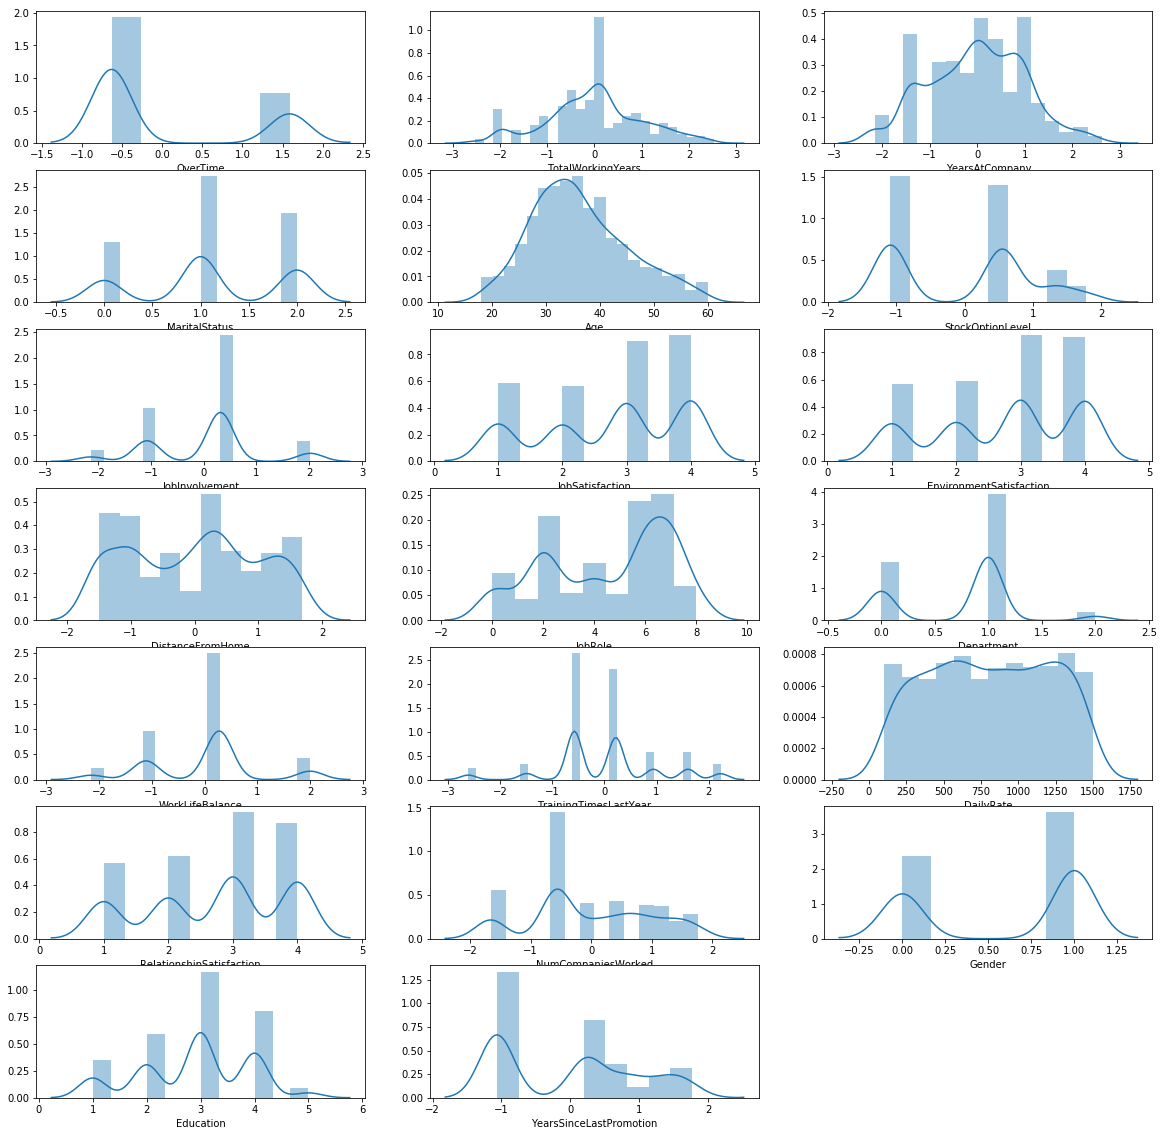

In [591]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data.drop("Attrition",axis=1):
    if plotno<=21:
        ax=plt.subplot(7,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=10)
    plotno+=1
plt.show()

Here we decrease some skewness. And distributed normally.

In [592]:
data.shape

(1365, 21)

### Data Loss

In [593]:
print("Percentage of lost data:"+str(((1470-1365)/1470)*100)+"%")

Percentage of lost data:7.142857142857142%


## Model Dployment

In [594]:
X=data.drop(columns=['Attrition'],axis=1)
Y=data['Attrition']

split data into features & labels.

### Normalizing the data

In [595]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[ 1.58683371, -0.15230242,  0.2610913 , ..., -1.23225411,
        -0.87449648, -1.06596024],
       [-0.63018575,  0.16967791,  0.99500652, ...,  0.81152093,
        -1.85453563,  0.23067911],
       [ 1.58683371, -0.33111358, -2.15148145, ...,  0.81152093,
        -0.87449648, -1.06596024],
       ...,
       [ 1.58683371, -0.52519441,  0.2610913 , ...,  0.81152093,
         0.10554268, -1.06596024],
       [-0.63018575,  1.06166215,  0.83378773, ...,  0.81152093,
         0.10554268, -1.06596024],
       [-0.63018575, -0.52519441, -0.23746641, ...,  0.81152093,
         0.10554268,  0.23067911]])

### target variable counplot

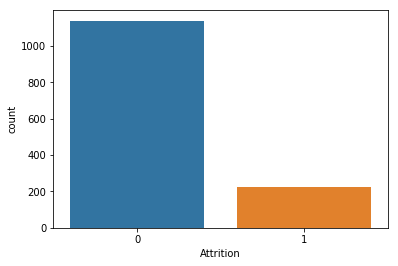

In [596]:
sns.countplot(data.Attrition)

target variable is imbalanced.

### Balacing Datasets

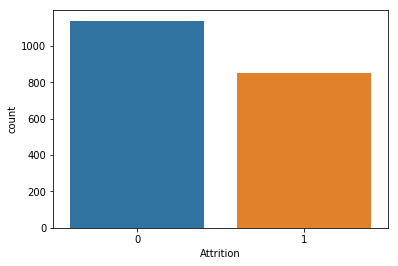

In [599]:
over_sampling=SMOTE(0.75)
X_,Y=over_sampling.fit_resample(X_,Y)

sns.countplot(Y)

Balaned our target variable.

In [602]:
X_.shape

(1993, 20)

After balancing we have now 1993 records.

In [603]:
Linear=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()

In [604]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost,Bagging]

In [605]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(1,150):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

LogisticRegression():
---------------------------
---------------------------

The highest accuracy is 83.70927318295739 of model LogisticRegression() at random state 86


Confusion Matrix:

 [[192  37]
 [ 36 134]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       229
           1       0.78      0.79      0.79       170

    accuracy                           0.82       399
   macro avg       0.81      0.81      0.81       399
weighted avg       0.82      0.82      0.82       399

DecisionTreeClassifier():
---------------------------
---------------------------

The highest accuracy is 87.71929824561403 of model DecisionTreeClassifier() at random state 37


Confusion Matrix:

 [[188  41]
 [ 38 132]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       229
           1       0.76      0.78      0.7

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [606]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(11,20):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7882228268968601 at k-fold::11

Mean CV Score of model LogisticRegression():: 0.7897428035495274 at k-fold::12

Mean CV Score of model LogisticRegression():: 0.7897429368017606 at k-fold::13

Mean CV Score of model LogisticRegression():: 0.7867132867132868 at k-fold::14

Mean CV Score of model LogisticRegression():: 0.7857446646920331 at k-fold::15

Mean CV Score of model LogisticRegression():: 0.7872379032258063 at k-fold::16

Mean CV Score of model LogisticRegression():: 0.7862310504384284 at k-fold::17

Mean CV Score of model LogisticRegression():: 0.7882700882700884 at k-fold::18

Mean CV Score of model LogisticRegression():: 0.7872614227877385 at k-fold::19


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.8309866928651459 at k-fold::11

Mean CV Score of model DecisionTreeClassifier():: 0.8419907173604596 at k-fold::12

Mean CV 

In [607]:
CVmodel

{'LogisticRegression()': [0.7897429368017606],
 'DecisionTreeClassifier()': [0.8431111372287844],
 'RandomForestClassifier()': [0.930291638186375],
 'KNeighborsClassifier()': [0.8414545980335454],
 'AdaBoostClassifier()': [0.8851455561981877],
 'BaggingClassifier()': [0.9044106995253556]}

here we can see the maximun CV score of each model

In [609]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LogisticRegression()::4.73
DecisionTreeClassifier()::3.41
RandomForestClassifier()::3.21
KNeighborsClassifier()::3.32
AdaBoostClassifier()::2.96
BaggingClassifier()::2.29


here for model BaggingClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 2.29 .

In [610]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=87)

here we split the dataset in training and testing dataset at RandomState 87.

### Plotting ROC Curve

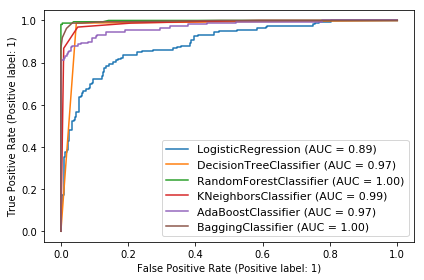

In [611]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(DecisionTree,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(knn,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(Bagging,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

## Hyperparameter Tuning

In [ ]:
BaggingClassifier()

In [613]:
params={
    "base_estimator":[RandomForest,knn],
    "n_estimators":[10,11,12],
    "max_samples":[0.5,1.0],
    "bootstrap":[True,False],
    "oob_score":[True,False]
}

In [614]:
grid=GridSearchCV(Bagging,param_grid=params,cv=17,n_jobs=-1)
grid.fit(X_train,Y_train)

GridSearchCV(cv=17, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [RandomForestClassifier(),
                                            <class 'sklearn.neighbors._classification.KNeighborsClassifier'>],
                         'bootstrap': [True, False], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 11, 12],
                         'oob_score': [True, False]})

In [615]:
grid.best_params_

{'base_estimator': RandomForestClassifier(),
 'bootstrap': False,
 'max_samples': 1.0,
 'n_estimators': 12,
 'oob_score': False}

In [616]:
Bagging=BaggingClassifier(base_estimator=RandomForest,bootstrap=False,max_samples=1.0,n_estimators=12,oob_score=False)
Bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), bootstrap=False,
                  n_estimators=12)

In [618]:
Y_pred=Bagging.predict(X_test)
accuracy_score(Y_pred,Y_test)*100

95.48872180451127

Here we increased the accuracy i.e. 95.5%

In [619]:
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))


print("Accuracy of Bagging Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")


print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for BaggingClassifer model:\n",classification_report(Y_test,Y_pred))



Predicted values:
 [0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]


The dataframe for the actual & predicted values:

       Actual data  Predicted
985             0          0
1113            0          0
530             0          0


## Saving Model

In [621]:
import pickle
pickle.dump(Bagging,open("HR_Attrition.pickle","wb"))